# `g3p` by Examples
`g3p` is a header-only *Modern C++* interface 
libray for [`gnuplot`](http://www.gnuplot.info). As it supports displaying plots in *Jupyter C++ Notebooks* via [`xeus-cling`](https://github.com/jupyter-xeus/xeus-cling), it makes a lot of sense to start learning  `g3p` by examples in a *Jupyter* notebook interactively.

[`gnuplot`](http://www.gnuplot.info) comes with lots of demos that you can find them [HERE](http://gnuplot.info/demos). We first start with [`simple functions`](https://gnuplot.sourceforge.net/demo_5.4/simple.html).

## 1. The header file
There's a single header file in `g3p` that you have to include once:

In [1]:
#include <g3p/gnuplot.hpp>

## 2. `gnuplot` instance
Now you can start with a `gnuplot` instance that is defined in `g3p` namespace. We name our instance `gp`:

In [2]:
g3p::gnuplot gp;

## 3. The basics
There are two ways to send string literals and variables to the `gnuplot` instance: `C` and `C++` conventions. You can even mix and match them. Let's start with the latter.
### 3.1. `C++` *convention*
For our first plot we use the `C++` *convention* and use almost a verbatim copy of the [`Simple Plots`](https://gnuplot.sourceforge.net/demo_5.4/simple.html) demo:

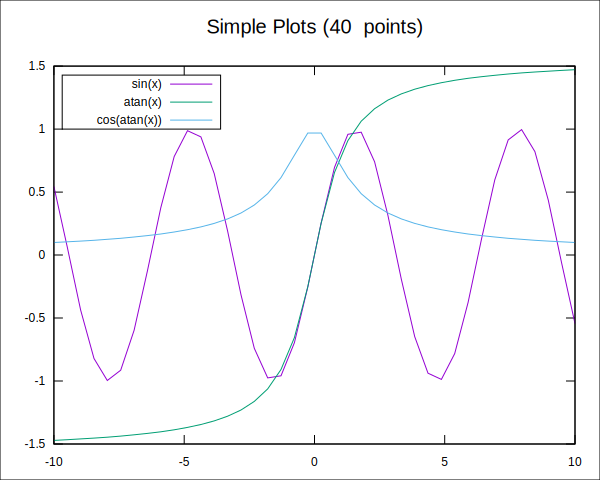

In [3]:
int count = 40;
gp << "set title 'Simple Plots (" << count << " points)' font ',20'\n"
   << "set key left box\n"
   << "set samples " << count << "\n"
   << "set style data points\n"
   << "plot [-10:10] sin(x),atan(x),cos(atan(x))\n"

As you can see, in order to display the plot, you just need to omit the last semicolon of a code cell. So, to replot the last one, you can type the name of the `gnuplot` instance without semicolon:

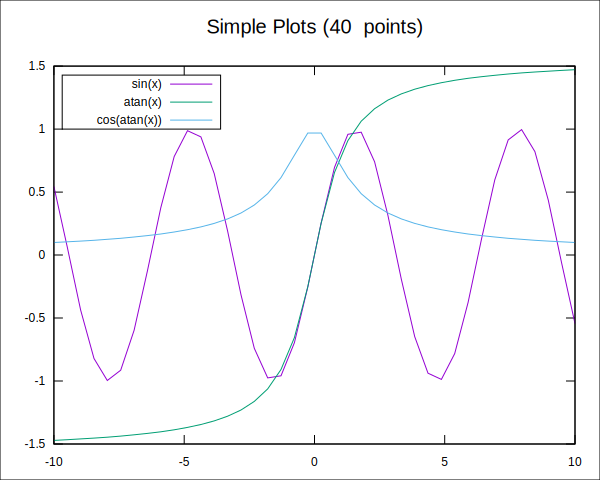

In [4]:
gp

Another way to achieve this is using the `xcpp::display()` function. A subtle distinction between using `xcpp::display()` and omitting the last semicolon is that the latter results in a cell output including a prompt number, while the former only shows the plot. This behaviour is consistent with the Python kernel implementation.

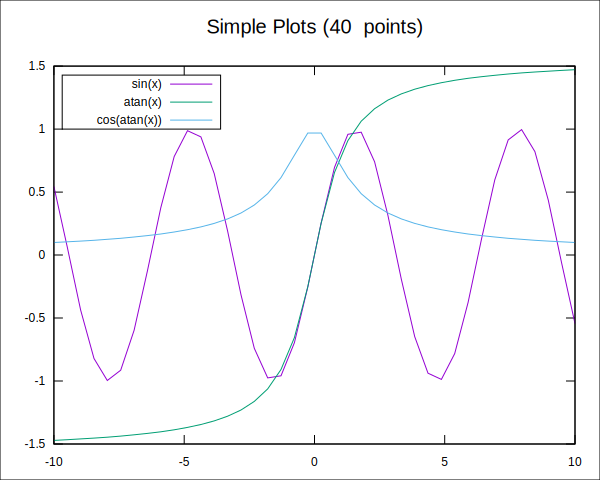

In [5]:
xcpp::display(gp);

### 3.2. `C` *convention*
Now we will plot it again with more points using `C` *convention*:

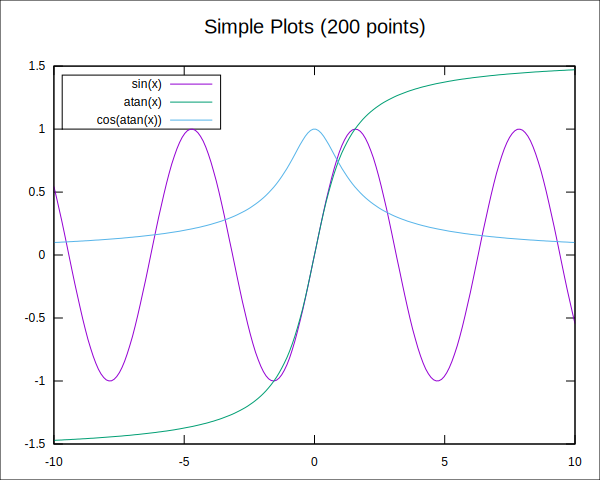

In [6]:
count = 200;
gp ( "set title 'Simple Plots (%d points)'", count )
   ( "set samples %d", count)
   ( "replot" )

### 3.3. Newline
As you may noticed in the above examples, one important difference between `C++` and `C` *conventions* is that a newline character will be added automatically at the end of the string literals for the latter. In `g3p`, there are various ways to send a newline to a `gnuplot` instance:
- **Implicit**
  - String literal in a parenthesis (i.e. overloaded function operator): `gp("...");`
- **Explicit**
  - String literal: `gp << "\n";` (NOTE: unlike C++ streams, single quote is not valid. So, `gp << '\n';` doesn't compile)
  - End-of-line member function: `gp.endl();`
  - End-of-line manipulator: `gp << g3p::endl;`

Like [`std::endl`](https://en.cppreference.com/w/cpp/io/manip/endl) manipulator for C++ streams, `g3p::endl` inserts a newline character and also flushes it by calling `gnuplot::flush()`, which doesn't happen for other methods.

Let's try all of the above methods in the same order for our next plot:

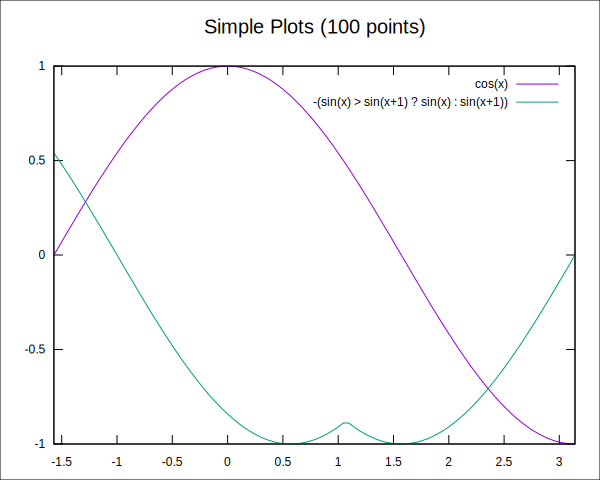

In [7]:
count = 100;
gp (  "set title 'Simple Plots (%d points)", count );  // implicit
gp << "set key right nobox" << "\n";                   // explicit - string literal
gp <<  "set samples " << count;
gp.endl();                                            // explicit - member function
gp << "plot [-pi/2:pi] cos(x),-(sin(x) > sin(x+1) ? sin(x) : sin(x+1))"
   << g3p::endl                                       // explicit - manipulator